<a href="https://colab.research.google.com/github/ssuxmin/sumin/blob/main/Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exam1

In [ ]:
import tensorflow as tf
import numpy as np

tf.__version__

'2.15.0'

In [ ]:
import numpy as np
from sklearn.datasets import make_circles

inputs, targets = make_circles(n_samples=5000, factor=0.5, noise=0.05)
inputs_dev, targets_dev = make_circles(n_samples=1000, factor=0.5, noise=0.05)

import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets)
plt.show()

### Q1 [10] 아래와 같은 모형을 완성해주세요.
  - [5] inputs 와 inputs_dev 데이터의 차원을 확인해주세요.
  - [5] 아래와 같이 모형을 정의해 봅시다.
    
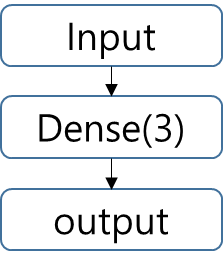

In [ ]:
# 1. inputs와 inputs_dev 데이터의 차원 확인
print("inputs shape:", inputs.shape)
print("inputs_dev shape:", inputs_dev.shape)

inputs shape: (5000, 2)
inputs_dev shape: (1000, 2)


In [ ]:
# 입력 데이터의 형태 지정
input_shape = inputs.shape[1:]

# 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_shape),
    tf.keras.layers.Dense(3, activation='relu', name='dense_1'),
    tf.keras.layers.Dense(1, activation='sigmoid', name='dense_2')
])


# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 구조 확인
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 3)                 9         
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Q2 [20] 모형을 컴파일해보세요.  
 - [5] optimizer 로 'SGD' 를 사용합니다.
 - [5] binary cross entropy loss 를 사용합니다.
 - [5] evaluation metric 으로 'accuracy' 를 사용합니다.
 - [5] 배치사이즈를 50으로 하고, 100 epoch 학습을 수행해보세요. validation 데이터로 inputs_dev, targets_dev를 활용해서 학습과정중에 dev셋 성능을 확인해주세요.

In [ ]:
import tensorflow as tf

# 모델 컴파일
model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 모델 학습
history = model.fit(inputs, targets, epochs=100, batch_size=50, validation_data=(inputs_dev, targets_dev))

Epoch 1/100
100/100 [==============================] - 1s 4ms/step - loss: 0.6460 - accuracy: 0.5158 - val_loss: 0.6334 - val_accuracy: 0.5250
Epoch 2/100
100/100 [==============================] - 0s 3ms/step - loss: 0.6262 - accuracy: 0.5386 - val_loss: 0.6205 - val_accuracy: 0.5520
Epoch 3/100
100/100 [==============================] - 0s 2ms/step - loss: 0.6167 - accuracy: 0.5658 - val_loss: 0.6133 - val_accuracy: 0.5900
Epoch 4/100
100/100 [==============================] - 0s 2ms/step - loss: 0.6109 - accuracy: 0.6216 - val_loss: 0.6084 - val_accuracy: 0.6420
Epoch 5/100
100/100 [==============================] - 0s 2ms/step - loss: 0.6064 - accuracy: 0.6642 - val_loss: 0.6039 - val_accuracy: 0.6870
Epoch 6/100
100/100 [==============================] - 0s 2ms/step - loss: 0.6020 - accuracy: 0.6910 - val_loss: 0.5997 - val_accuracy: 0.7090
Epoch 7/100
100/100 [==============================] - 0s 2ms/step - loss: 0.5981 - accuracy: 0.7060 - val_loss: 0.5959 - val_accuracy: 0.7250

In [ ]:
model.evaluate(inputs_dev, targets_dev)

32/32 [==============================] - 0s 3ms/step - loss: 0.2181 - accuracy: 0.9720


[0.21810512244701385, 0.972000002861023]

성능을 확인하기 위해 시각화 시켜보면 아래와 같습니다.

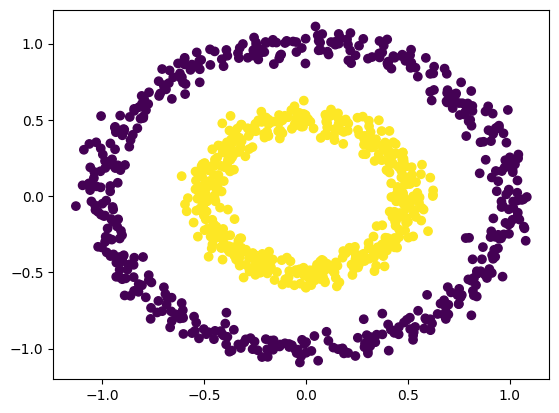

In [ ]:
## Plot of the ground truth set
import matplotlib.pyplot as plt
plt.scatter(inputs_dev[:, 0], inputs_dev[:, 1], c=targets_dev)
plt.show()

32/32 [==============================] - 0s 3ms/step


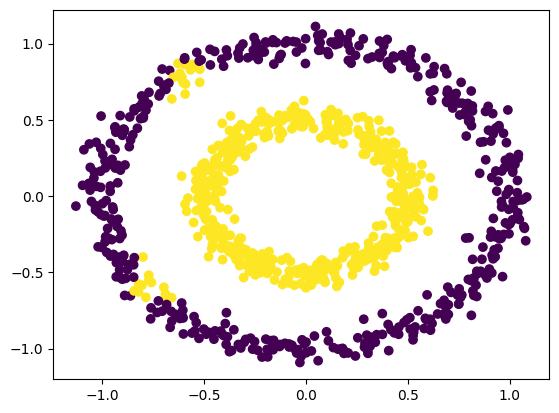

In [ ]:
## Plot of your model
## replace the result with your upgraded model
import matplotlib.pyplot as plt
res1 = model.predict(inputs_dev)
decision1 = res1 > .5
plt.scatter(inputs_dev[:, 0], inputs_dev[:, 1], c=decision1)
plt.show()

### Q3 [10] 임의로 모형을 만들어서 성능을 향상시켜보세요.

In [ ]:
import tensorflow as tf

# 모형 정의
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_shape),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 모형 컴파일
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 학습
history = model.fit(inputs, targets,
                    batch_size=50,
                    epochs=100,
                    validation_data=(inputs_dev, targets_dev))

Epoch 1/100
100/100 [==============================] - 3s 9ms/step - loss: 0.6403 - accuracy: 0.5348 - val_loss: 0.5696 - val_accuracy: 0.5750
Epoch 2/100
100/100 [==============================] - 0s 4ms/step - loss: 0.4752 - accuracy: 0.8676 - val_loss: 0.3006 - val_accuracy: 1.0000
Epoch 3/100
100/100 [==============================] - 0s 4ms/step - loss: 0.2380 - accuracy: 0.9812 - val_loss: 0.1037 - val_accuracy: 1.0000
Epoch 4/100
100/100 [==============================] - 0s 4ms/step - loss: 0.1151 - accuracy: 0.9878 - val_loss: 0.0416 - val_accuracy: 1.0000
Epoch 5/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0646 - accuracy: 0.9918 - val_loss: 0.0222 - val_accuracy: 1.0000
Epoch 6/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0465 - accuracy: 0.9930 - val_loss: 0.0151 - val_accuracy: 1.0000
Epoch 7/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0363 - accuracy: 0.9938 - val_loss: 0.0113 - val_accuracy: 1.0000

### Q4 [10] 아래의 Fake input 데이터가 추가되었을 때, multi-input 모형을 정의하여 아래 그림과 같이 모형을 만들어주세요.
 - 모형을 만든 후 적절하게 컴파일 및 학습을 시켜보세요.

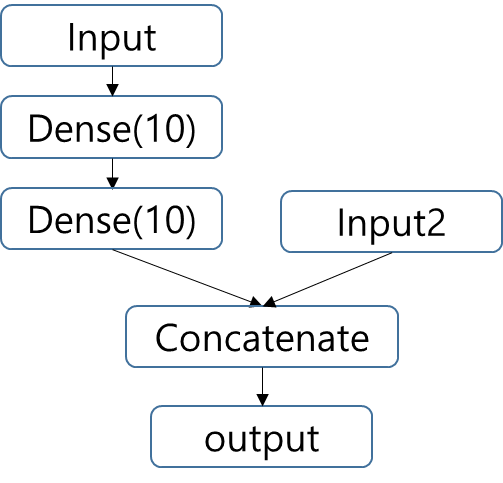

In [ ]:
import numpy as np
fake_input = targets - 5 + np.random.random(len(targets))*10
fake_input_dev = targets_dev - 5 + np.random.random(len(targets_dev))*10

In [ ]:
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow import keras
from tensorflow.keras import layers

# 첫 번째 입력 레이어
my_input = Input(shape=(2,), name='my_input')

# 첫 번째 레이어
dense_10 = Dense(10, activation='relu')(my_input)

# 두 번째 레이어
dense_11 = Dense(10, activation='relu')(dense_10)

# 두 번째 입력 레이어
my_input2 = Input(shape=(1,), name='my_input2')

# Concatenate 레이어
concatenate_2 = Concatenate()([dense_11, my_input2])

# 출력 레이어
dense_12 = Dense(1, activation='sigmoid')(concatenate_2)

# 모델 정의
model_2 = Model(inputs=[my_input, my_input2], outputs=dense_12)

# 모델 컴파일
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 구조 확인
model_2.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 my_input (InputLayer)       [(None, 2)]                  0         []                            
                                                                                                  
 dense_15 (Dense)            (None, 10)                   30        ['my_input[0][0]']            
                                                                                                  
 dense_16 (Dense)            (None, 10)                   110       ['dense_15[0][0]']            
                                                                                                  
 my_input2 (InputLayer)      [(None, 1)]                  0         []                            
                                                                                            

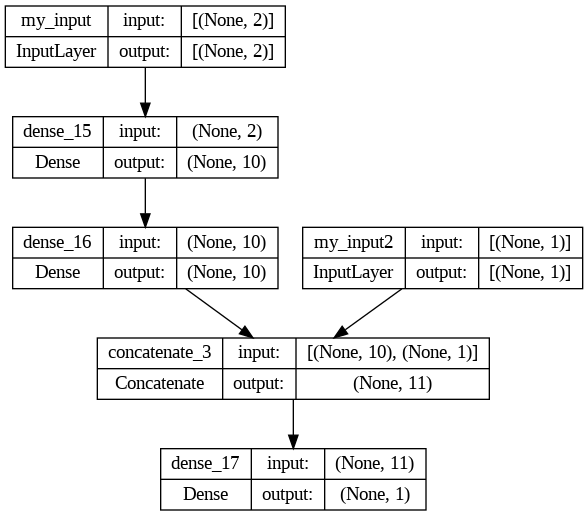

In [ ]:
keras.utils.plot_model(model_2, "model2.png", show_shapes=True)

# Dog and Cat data
- 아래의 Dog vs Cat 데이터를 읽어옵시다.

In [ ]:
import os
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

68606236/68606236 [==============================] - 2s 0us/step


In [ ]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

(Q1-1) 데이터를 살펴보세요. Train, Validation 데이터에 각각 몇개씩 샘플이 있습니까?


In [ ]:
# Train dataset
print(f'train dataset : {total_train}')
print(f'Validation dataset : {total_val}')

train dataset : 2000
Validation dataset : 1000


(Q1-2) 아래 데이터 파이프라인을 완성하세요.
- Train data 는 PATH 디렉토리 안의 train 디렉토리로부터 가져오세요.
- Vailidation data는 PATH 디렉토리 안의 Vailidation 디렉토리로부터 가져오세요.
- ***그림 크기는 (150,150)으로 읽어오세요. vs  그림 크기는 (100,100)으로 읽어오세요***
- batch size 는 64로 설정하세요

In [ ]:
import os, shutil, pathlib
from tensorflow.keras.utils import image_dataset_from_directory
basedir = pathlib.Path("PATH")

train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(150, 150),
    batch_size=64)
validation_dataset = image_dataset_from_directory(
    validation_dir,
    image_size=(150, 150),
    batch_size=64)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (64, 150, 150, 3)
labels batch shape: (64,)


(Q1-3) 아래와 같이 모형을 만들어보세요.
- 네개의 Conv2D block 을 사용하고, 각각의 필터 갯수는 15, 30, 60, 100 개로 설정.
- 각각 strides 는 1 zero padding은 적용하지 않음
- MaxPooling2D의 filter는 (2,2)로 설정, stride 는 2
- output layer의 차원은 1 또는 2로 편하게 설정..  (1 로 하든, 2로하든 뒤에 loss를 잘 정의하여 모형이 잘 학습되도록 할 것!)

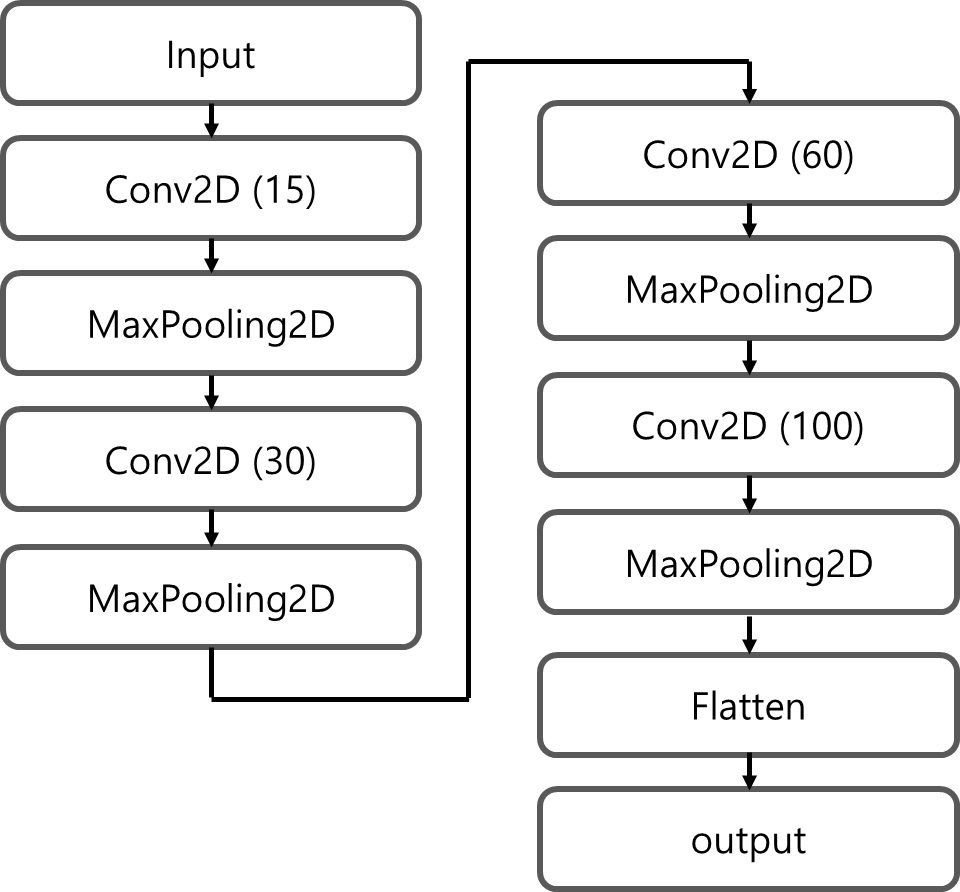

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

### 여기 모형부분을 완성하세요.
inputs = keras.Input(shape = (150,150,3))
x = layers.Conv2D(filters = 15, kernel_size = 3,strides = 1, activation = 'relu')(inputs)
x = layers.MaxPooling2D(pool_size = (2,2), strides=2)(x)
x = layers.Conv2D(filters = 30,  kernel_size = 3,strides = 1, activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = (2,2), strides=2)(x)
x = layers.Conv2D(filters = 60,  kernel_size = 3,strides = 1, activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = (2,2), strides=2)(x)
x = layers.Conv2D(filters = 100,  kernel_size = 3,strides = 1, activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = (2,2), strides=2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs,outputs)
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 148, 148, 15)      420       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 74, 74, 15)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 72, 72, 30)        4080      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 36, 36, 30)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 34, 34, 60)        1626

(Q1-4) 아래와 같이 모형을 컴파일하세요.
- loss 는 binary cross entrophy loss 또는 cross entrophy loss를 사용하세요 (앞 모형의 output 차원에 따라 적절하게 정의하세요)
- optimizer 로 rmsprop을 사용하세요.
- metric으로 accuracy를 사용하세요.

In [ ]:
from tensorflow.keras import optimizers

model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"])

(Q1-5) 아래 코드를 완성하여 모형을 학습시키세요.

- callback 은 validation accuracy 기준으로 가장 성능 좋은 모형을 저장하도록 설정하세요.
- 10 epoch 만 트레이닝해 보세요.

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="bestmodel.keras",
        save_best_only=True,
        monitor="val_accuracy")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
32/32 [==============================] - 69s 2s/step - loss: 7.5753 - accuracy: 0.5135 - val_loss: 0.7967 - val_accuracy: 0.5430
Epoch 2/10
32/32 [==============================] - 53s 2s/step - loss: 0.7351 - accuracy: 0.5800 - val_loss: 0.8419 - val_accuracy: 0.5030
Epoch 3/10
32/32 [==============================] - 47s 1s/step - loss: 0.6795 - accuracy: 0.5975 - val_loss: 0.8419 - val_accuracy: 0.5070
Epoch 4/10
 2/32 [>.............................] - ETA: 51s - loss: 0.7307 - accuracy: 0.5781

KeyboardInterrupt: 

(Q1-6) Data augmentation 을 추가로 적용해보세요.
- RandomFlip으로 좌우, 상하방향 대칭을 추가하세요.
- RandomZoom 을 적당한 파라메터로 추가하세요.

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.3),
        layers.RandomFlip("vertical"),
        layers.RandomRotation(0.2),
        layers.RandomZoom(height_factor=0.2, width_factor=0.2),
    ]
)

(Q1-7) 앞에서 정의한 모형에서 data augmentation 을 추가로 적용하여 20 epoch 만 학습시켜보고 validation accuracy 기준 가장 좋았던 결과를 알려주세요.

In [ ]:
inputs = keras.Input(shape = (150,150,3))
x = data_augmentation(inputs)
x = layers.Conv2D(filters = 15, kernel_size = 3,strides = 1, activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = (2,2), strides=2)(x)
x = layers.Conv2D(filters = 30,  kernel_size = 3,strides = 1, activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = (2,2), strides=2)(x)
x = layers.Conv2D(filters = 60,  kernel_size = 3,strides = 1, activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = (2,2), strides=2)(x)
x = layers.Conv2D(filters = 100,  kernel_size = 3,strides = 1, activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = (2,2), strides=2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs,outputs)
model.summary()

model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="bestmodel.keras",
        save_best_only=True,
        monitor="val_accuracy")
]
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset,
    callbacks=callbacks)

print('The Best validation_accuracy : ' ,max(history.history['val_accuracy']))

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 sequential_7 (Sequential)   (None, 150, 150, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 148, 148, 15)      420       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 74, 74, 15)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 30)        4080      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 36, 36, 30)        0         
 g2D)                                                      

KeyboardInterrupt: 

# Exam 2

In [ ]:
import tensorflow as tf
import numpy as np

tf.__version__

'2.15.0'

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channels dimension
x_train = x_train[..., tf.newaxis].astype("float32")
x_test = x_test[..., tf.newaxis].astype("float32")

#train_labels = tf.keras.utils.to_categorical(y_train)
#test_labels = tf.keras.utils.to_categorical(y_test)

11490434/11490434 [==============================] - 0s 0us/step


## 손글씨 데이터에서 0--3 사이의 숫자에 대해서만 서브셋을 취해서 모형을 만들어 보고자 합니다.

### Q1 아래는 0--3 사이 숫자 데이터를 준비하기 위한 일부 코드이다. [10 points]
 - 부족한 부분을 완성시키시오.
 - 트레이닝 데이터 갯수를 구하시오.

In [ ]:
idx_0_3_train = np.array([ (nm in [0,1,2,3] ) for nm in y_train ] )
idx_0_3_test = np.array([ (nm in [0,1,2,3] ) for nm in y_test ] )

In [ ]:
x_train_0_3 = x_train[idx_0_3_train]
x_test_0_3 = x_test[idx_0_3_test]

y_train_0_3 = y_train[idx_0_3_train]
y_test_0_3 = y_test[idx_0_3_test]


In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_0_3 = to_categorical(y_train_0_3)
y_test_0_3 = to_categorical(y_test_0_3)

In [ ]:
print('Shape of Training data : ',x_train_0_3.shape)
print('Shape of Test data : ',x_test_0_3.shape)

Shape of Training data :  (24754, 28, 28, 1)
Shape of Test data :  (4157, 28, 28, 1)


In [ ]:
## 트레이닝 데이터 갯수를 확인하세요.
print('# of Training data : ',x_train_0_3.shape[0])
print('# of Test data : ',x_test_0_3.shape[0])

# of Training data :  24754
# of Test data :  4157


### Q2 0--3 사이의 숫자 데이터에 대해 아래와 같은 구조를 같는 모형을 만들어 보자. [20 points]
- 1개의 Convolution layer 를 사용하세요. filter size는 각각 (3,3)을 사용하고, zero padding 을 사용해서 input 과 output의 가로세로 차원을 같게해주세요. 활성함수로는 relu 를 사용해주세요.
- Convolution layer 이후에는 Maxpooling layer 를 사용해주세요. 필터는 (4,4), stride 는 4을 사용해주세요.
- 1개의 Convolution layer 이후에 Flatten layer를 적용해주세요.
- Output layer 로 Dense layer 에 softmax 활성함수를 사용해주세요.

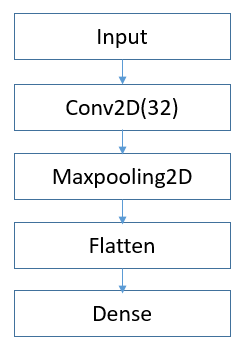

In [ ]:
from tensorflow.keras import layers, models

## 이 부분을 완성하세요.
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), strides=(1, 1), padding = "same", activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((4, 4),strides=(4,4)))
model.add(layers.Flatten())
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 1568)              0         
                                                                 
 dense_23 (Dense)            (None, 50)                78450     
                                                                 
 dense_24 (Dense)            (None, 4)                 204       
                                                                 
Total params: 78974 (308.49 KB)
Trainable params: 78974 (308.49 KB)
Non-trainable params: 0 (0.00 Byte)
________________

### Q3 모형 컴파일 후 학습을 수행해보세요. [10 points]
- optimizer 는 'Adam'을 사용하세요.
- loss로 categorical cross entropy 를 사용하세요.
- 평가용 metric 으로 'accuracy' 를 사용하세요.
- Epoch 은 5, batch size 는 32를 사용하여 학습을 수행해보세요.

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## fit your model with model.fit()


In [ ]:
### Define how you fit your model

history = model.fit(x_train_0_3, y_train_0_3, epochs=5, batch_size=32)

Epoch 1/5
774/774 [==============================] - 3s 3ms/step - loss: 0.0986 - accuracy: 0.9721
Epoch 2/5
774/774 [==============================] - 2s 3ms/step - loss: 0.0281 - accuracy: 0.9910
Epoch 3/5
774/774 [==============================] - 2s 3ms/step - loss: 0.0183 - accuracy: 0.9939
Epoch 4/5
774/774 [==============================] - 2s 3ms/step - loss: 0.0140 - accuracy: 0.9958
Epoch 5/5
774/774 [==============================] - 2s 3ms/step - loss: 0.0121 - accuracy: 0.9960


### Q4 x_test_0_3, y_test_0_3 의 테스트 데이터에 대해 성능을 평가해보세요. [10 points]

In [ ]:
loss , acc = model.evaluate(x_test_0_3, y_test_0_3)
print('모델의 accuracy는 ',round(acc*100,2),'%이다')

130/130 [==============================] - 0s 3ms/step - loss: 0.0193 - accuracy: 0.9942
모델의 accuracy는  99.42 %이다


### Q6 아래와 같이 모형을 만들어보세요. [40 points]
- [10] 임의의 ImageNet 데이터를 이용한 pre-trained network을 가져와서 아래 그림과 같은 모형을 정의해보세요.
- [10] Fine tunning 을 적용하지 않고 Dense 레이어만 학습시켜 모형을 적합시켜보세요
- [10] Fine tunning을 적용하여 learning rate을 줄여서 3 epoch 정도만 더 학습시켜보세요.
- [10] validation 셋을 통해 성능을 평가해보세요

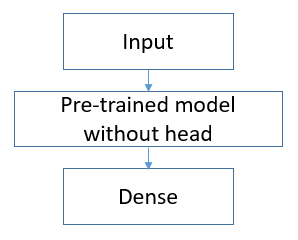

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np

# Exam 3


## Q1 - example 1 ~ 3

In [ ]:
import tensorflow
tensorflow.__version__

'2.15.0'

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

(1) [30점] 아래의 내용을 만족하는 CNN을 작성해 봅시다.
 - 3개 층의 CNN layer 를 사용해서 모형을 작성해 보세요(필터갯수, 커널 크기, padding 방식, stride, activation 함수는 모형이 정의되는 한도 내에서 자유롭게 정의 가능).
 - 각 CNN layer 뒤에 (2,2)의 max pooling layer 도 포함시켜주세요.
 - 3개 층의 CNN layer 를 통과한 결과를 Flatten 시켜서 1개 층의 Dense layer 를 사용해 모형을 만들어 보세요.
 -

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models
import tensorflow as tf

model = tf.keras.Sequential([
    layers.Conv2D(16, (3, 3), strides=(1, 1), padding = "same", activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2),strides=(2,2)),
    layers.Conv2D(32, (3, 3), strides=(1, 1), padding = "same", activation='relu'),
    layers.MaxPooling2D((2, 2),strides=(2,2)),
    layers.Conv2D(32, (3, 3), strides=(1, 1), padding = "same", activation='relu'),
    layers.Flatten(),
    layers.Dense(50, activation='relu'),
    layers.Dense(10, activation='softmax'),
  # Rest of your model
])
### Define your model here

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          9248      
                                                                 
 flatten (Flatten)           (None, 1568)              0

(2) [20점] 아래와 같이 모형을 컴파일하고 훈련을 수행해보세요.  
 - optimizer 로는 Adam optimizer 사용
 - loss는 categorical cross entropy를 사용
 - 모형 평가 metric 으로 accuracy를 사용
 - 훈련에 있어서 epoch=5, batch size 는 32를 사용

In [ ]:
## compile your model with model.compile()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## fit your model with model.fit()
model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 11s 3ms/step - loss: 0.1453 - accuracy: 0.9544
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0489 - accuracy: 0.9850
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0341 - accuracy: 0.9894
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0260 - accuracy: 0.9919
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0201 - accuracy: 0.9935


테스트 정확도를 출력해보면 아래와 같습니다.

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 1s 2ms/step - loss: 0.0280 - accuracy: 0.9909


0.9908999800682068

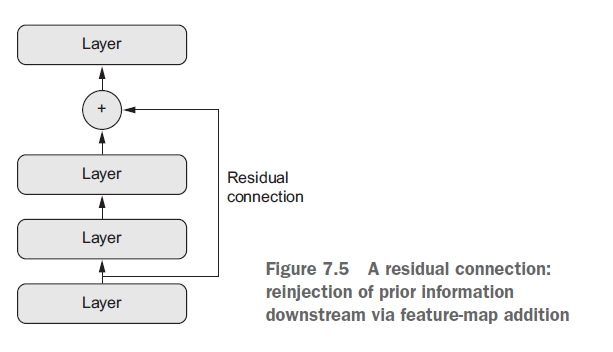

(3) [30점] ResNet의 Residual connection 구조를 정의하고 모형에 적용해 보세요. (그림 7.5 참고)
- 추천하는 방법: residual connection block을 함수로 짠 후, residual connection block을 3번 호출 (residual connection 의 큰 그림만 반영 된다면 세부 파라메터들은 임의로 설정해도 무방함)

In [ ]:
## model here

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow import keras

#model = models.Sequential()
### Define your model here
inputs = keras.Input(shape=(28, 28, 1))
def residual_block(x, filters, pooling=False):
    x = layers.Conv2D(filters, 3, activation="relu", padding="same")(x)
    residual = x
    x = layers.Conv2D(filters, 3, activation="relu", padding="same")(x)
    x = layers.Conv2D(filters, 3, activation="relu", padding="same")(x)
    if pooling:
        x = layers.MaxPooling2D(2, padding="same")(x)
        residual = layers.Conv2D(filters, 1, strides=2)(residual)
    elif filters != residual.shape[-1]:
        residual = layers.Conv2D(filters, 1)(residual)
    x = layers.add([x, residual])
    x = layers.Conv2D(filters, 3, activation="relu", padding="same")(x)
    return x

x = residual_block(inputs, filters=32, pooling=True)
x = residual_block(x, filters=64, pooling=True)
x = residual_block(x, filters=128, pooling=False)

x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(10, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_3 (Conv2D)           (None, 28, 28, 32)           320       ['input_2[0][0]']             
                                                                                                  
 conv2d_4 (Conv2D)           (None, 28, 28, 32)           9248      ['conv2d_3[0][0]']            
                                                                                                  
 conv2d_5 (Conv2D)           (None, 28, 28, 32)           9248      ['conv2d_4[0][0]']            
                                                                                            

In [ ]:
## compile your model with model.compile()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## fit your model with model.fit()
model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 18s 7ms/step - loss: 0.2576 - accuracy: 0.9148
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0564 - accuracy: 0.9837
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0421 - accuracy: 0.9878
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0363 - accuracy: 0.9893
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0303 - accuracy: 0.9911


In [ ]:
# Test accuracy

test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 1s 3ms/step - loss: 0.0239 - accuracy: 0.9934


0.993399977684021

# Exam 4

In [ ]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channels dimension
x_train = x_train[..., tf.newaxis].astype("float32")
x_test = x_test[..., tf.newaxis].astype("float32")

train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

(1) [20점] 아래의 그림과 같은 구조를 가지는 CNN 모형을 작성해 봅시다.

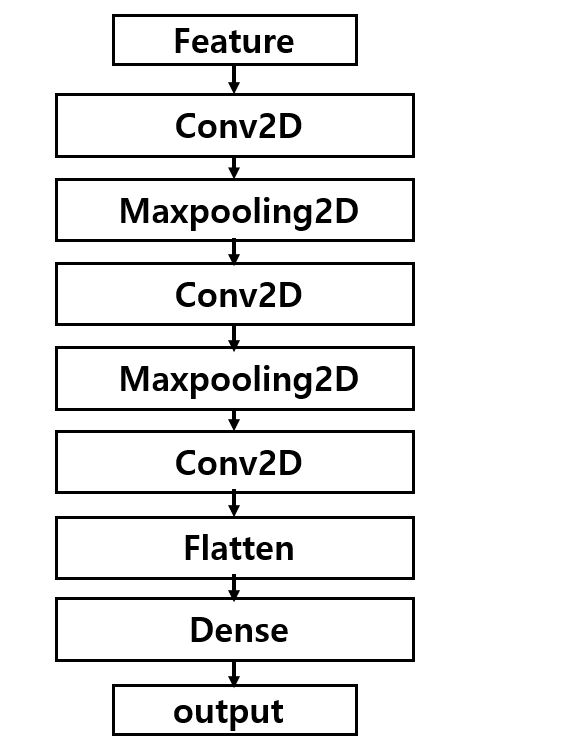

- Convolution layer 의 필터 갯수는 각각 16, 32, 32개로 설정하세요
- 모든 Convolution layer 에서 커널 크기는 모두 (3,3) 으로 설정하고, zero padding을 적용하고. stride 는 1칸씩 진행되도록 합니다.
- 모든 Convolution layer 에서 activation 은 'relu'를 사용합니다.
- Maxpooling 은 가로 세로 2칸씩 적용하도록 하고, stride 역시 2칸씩 진행합니다.
- Flatten layer 이후의 Dense layer 의 필터 갯수는 50으로 하고, activation은 'relu'함수를 사용합니다.


In [ ]:
### Define your model here
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), strides=(1, 1), padding = "same", activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2),strides=(2,2)))
model.add(layers.Conv2D(32, (3, 3), strides=(1, 1), padding = "same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2),strides=(2,2)))
model.add(layers.Conv2D(32, (3, 3), strides=(1, 1), padding = "same", activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 7, 7, 32)          9248      
                                                                 
 flatten_2 (Flatten)         (None, 1568)             

(2) [20점] 아래와 같이 모형을 컴파일하고 훈련을 수행해보세요.  
 - optimizer 로는 Adam optimizer 사용
 - loss는 categorical cross entropy를 사용
 - 모형 평가 metric 으로 accuracy를 사용
 - 훈련에 있어서 epoch=5, batch size 는 32를 사용

In [ ]:
## compile your model with model.compile()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## fit your model with model.fit()
model.fit(x_train, train_labels, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 8s 3ms/step - loss: 0.1403 - accuracy: 0.9563
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0468 - accuracy: 0.9855
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0335 - accuracy: 0.9895
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0264 - accuracy: 0.9916
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0217 - accuracy: 0.9931


(3) [30점] Data Augmentation 을 적용하여 훈련을 시켜보세요.

- Data Augmentation 으로 RandomFlip 을 가로, 세로방향을 적용하고, RandomRotation을 시계방향 반시계방향으로 30도 정도 회전을 적용합니다.
- Tensorflow data api를 사용하면 조금 더 편한 것 같습니다. (안사용해도 괜찮습니다)

In [ ]:
#필요한 패키지 로드
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channels dimension
x_train = x_train[..., tf.newaxis].astype("float32")
x_test = x_test[..., tf.newaxis].astype("float32")

train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

In [ ]:
#데이터 증강
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

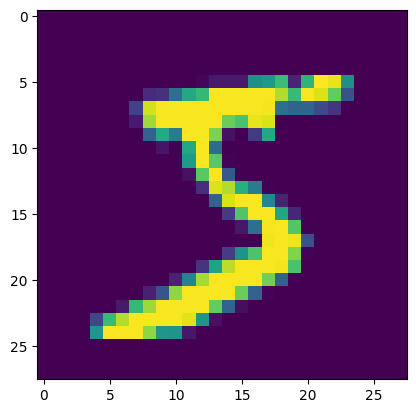

In [ ]:
#그림 확인
image = next(iter(x_train))
_ = plt.imshow(image.reshape(28,28))
#_ = plt.title(get_label_name(label))

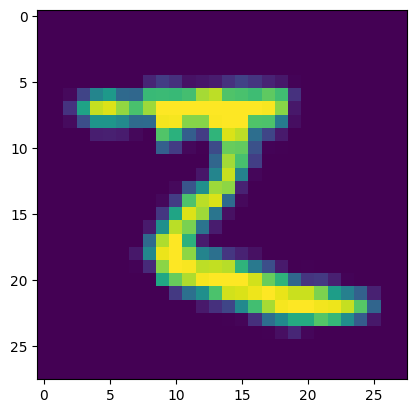

In [ ]:
#그림 확인
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()
image = next(iter(x_train))
aug = data_augmentation(image)
#print(aug.reshape(28,28))
_ = plt.imshow(aug.reshape(28,28))
#_ = plt.title(get_label_name(label))

In [ ]:
## compile your model with model.compile()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## fit your model with model.fit()
model.fit(x_train, train_labels, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7615 - accuracy: 0.7428
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3662 - accuracy: 0.8824
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2915 - accuracy: 0.9045
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2580 - accuracy: 0.9161
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2294 - accuracy: 0.9260


In [ ]:
#데이터 증강을 적용한 모델
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_4 (Sequential)    multiple                  0         
_________________________________________________________________
conv2d_24 (Conv2D)           (32, 28, 28, 16)          160       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (32, 14, 14, 16)          0         
_________________________________________________________________
conv2d_25 (Conv2D)           (32, 14, 14, 32)          4640      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (32, 7, 7, 32)            0         
_________________________________________________________________
conv2d_26 (Conv2D)           (32, 7, 7, 32)            9248      
_________________________________________________________________
flatten_8 (Flatten)          (32, 1568)               

(4) [30점] 5이상의 숫자(5,6,7,8,9)와 5미만의 숫자(0,1,2,3,4)를 판별하는 모형을 만들고 싶습니다. 아래의 작업들을 수행하세요.

- 5이상의 숫자를 0, 5미만의 숫자를 1로 하는 train_y_5, test_y_5 변수들을 만듭니다.
- (2) 또는 (3)에서 적합시킨 pre-trained network 을 가져와서 transefer learning 을 적용해서 5이상의 숫자와 5미만 숫자를 판별하는 모형을 만들어보세요.   
  - pre-trained network을 가져와서 마지막 layer 를 해당 문제에 맞게 수정해야 합니다.
  - fine-tuning 을 적용합니다. 마지막 Dense(50) Lyaer 를 trainable 하게하고, 그 상위 CNN 레이어 들은 Freeze 시킨 후 트레이닝 해보세요.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

import keras
from keras.datasets import cifar10
from keras.layers import Dense, Convolution2D, Flatten, Activation, MaxPooling2D, Dropout
from keras.models import Sequential
from keras.utils import to_categorical
from keras.applications import ResNet50
from keras.optimizers import Adam

In [ ]:
#train_y_5
train_y_5=[]
for i in y_train:
    if i >= 5:
        train_y_5.append('0')
    elif i < 5:
        train_y_5.append('1')

In [ ]:
#test_y_5
test_y_5=[]
for i in y_test:
    if i >= 5:
        test_y_5.append('0')
    elif i < 5:
        test_y_5.append('1')

In [ ]:
#넘파이 배열로 변환
import numpy as np
np.array(train_y_5)
np.array(test_y_5)

array(['0', '1', '1', ..., '1', '0', '0'], dtype='<U1')

In [ ]:
train_labels = to_categorical(train_y_5)
test_labels = to_categorical(test_y_5)

In [ ]:
model.layers[7]

In [ ]:
#모델 레이어 확인
model.layers[:7]

In [ ]:
trans_model = Sequential()
trans_model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
trans_model.add(MaxPooling2D(pool_size=(2, 2)))
trans_model.add(Flatten())
trans_model.add(Dense(64, activation='relu'))
trans_model.add(Dense(10, activation='softmax'))


chatgpt 돌린 결과임!!!

In [ ]:
import numpy as np
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.applications import ResNet50
from keras.models import Model
from keras.layers import Dense
from keras.optimizers import Adam

# 데이터셋 로드 및 전처리
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train_5 = np.where(y_train >= 5, 0, 1)
y_test_5 = np.where(y_test >= 5, 0, 1)

# Pre-trained network 로드
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# 마지막 레이어 수정
x = base_model.output
x = Flatten()(x)
predictions = Dense(1, activation='sigmoid')(x)

# 새로운 모델 정의
model = Model(inputs=base_model.input, outputs=predictions)

# Fine-tuning을 위한 레이어 고정 및 훈련 설정
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Fine-tuning: 마지막 Dense 레이어를 제외한 모든 레이어를 고정하고 훈련
model.fit(x_train, y_train_5, epochs=5, batch_size=32, validation_data=(x_test, y_test_5))

# 마지막 Dense 레이어만 trainable하게 설정
for layer in base_model.layers:
    layer.trainable = False
model.layers[-1].trainable = True

# 새로운 learning rate로 컴파일
model.compile(optimizer=Adam(lr=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 추가로 3 epoch 동안 더 훈련
model.fit(x_train, y_train_5, epochs=3, batch_size=32, validation_data=(x_test, y_test_5))

Epoch 1/5
1563/1563 [==============================] - 21s 11ms/step - loss: 0.6559 - accuracy: 0.6664 - val_loss: 0.6049 - val_accuracy: 0.6953
Epoch 2/5
1563/1563 [==============================] - 15s 10ms/step - loss: 0.5865 - accuracy: 0.7065 - val_loss: 0.5876 - val_accuracy: 0.7048
Epoch 3/5
1563/1563 [==============================] - 15s 10ms/step - loss: 0.5815 - accuracy: 0.7094 - val_loss: 0.6869 - val_accuracy: 0.6738
Epoch 4/5
1563/1563 [==============================] - 16s 10ms/step - loss: 0.5739 - accuracy: 0.7136 - val_loss: 0.5826 - val_accuracy: 0.7120
Epoch 5/5
1563/1563 [==============================] - 15s 10ms/step - loss: 0.5768 - accuracy: 0.7135 - val_loss: 0.5845 - val_accuracy: 0.7119


Epoch 1/3
1563/1563 [==============================] - 20s 11ms/step - loss: 0.5786 - accuracy: 0.7124 - val_loss: 0.5940 - val_accuracy: 0.7113
Epoch 2/3
1563/1563 [==============================] - 15s 10ms/step - loss: 0.5769 - accuracy: 0.7153 - val_loss: 0.5861 - val_accuracy: 0.7113
Epoch 3/3
1563/1563 [==============================] - 15s 10ms/step - loss: 0.5730 - accuracy: 0.7163 - val_loss: 0.5912 - val_accuracy: 0.7069


## 손글씨 데이터에서 0--6 사이의 숫자에 대해서만 모형을 만들어보고, 7--9 의 숫자 데이터에 대해 transfer learning 을 통해 모형을 적합시켜보고자 한다.

### Q1 [10점] 아래는 0--6 사이 숫자, 7--9 사이 숫자 데이터를 나누기 위한 일부 코드이다. 부족한 부분을 완성시키시오.

In [ ]:
# 0--6 사이 숫자, 7--9 사이 숫자 데이터를 분할하기 위한 조건 생성
idx_0_6_train = np.array([True if nm in [0, 1, 2, 3, 4, 5, 6] else False for nm in y_train])
idx_0_6_test = np.array([True if nm in [0, 1, 2, 3, 4, 5, 6] else False for nm in y_test])


In [ ]:
## 부분을 완성하세요.
x_train_0_6 = x_train[idx_0_6_train]
x_train_7_9 = x_train[~idx_0_6_train]
x_test_0_6 = x_test[idx_0_6_test]
x_test_7_9 = x_test[~idx_0_6_test]

y_train_0_6 = y_train[idx_0_6_train]
y_train_7_9 = y_train[~idx_0_6_train]
y_test_0_6 = y_test[idx_0_6_test]
y_test_7_9 = y_test[~idx_0_6_test]

In [ ]:
len(x_train_0_6) + len(x_train_7_9) + len(x_test_0_6) + len(x_test_7_9)

60000

### Q2 [20점] 0--6 사이의 숫자 데이터에 대해 아래와 같은 구조를 같는 모형을 만들어 보자.
- 2개의 Convolution layer 를 사용하세요. filter size는 각각 (3,3)을 사용하고, zero padding 을 사용해서 input 과 output의 가로세로 차원을 같게해주세요. 활성함수로는 relu 를 사용해주세요.
- Convolution layer 이후에는 Maxpooling layer 를 사용해주세요. 필터는 (3,3), stride 는 3을 사용해주세요.
- 2개의 Convolution layer 이후에 Flatten layer를 적용해주세요.
- Output layer 로 Dense layer 에 softmax 활성함수를 사용해주세요.


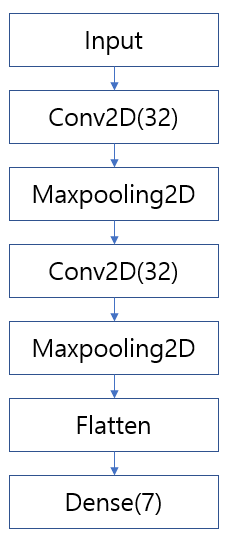

In [ ]:
from tensorflow.keras import layers, models

# 모형 정의
model = models.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((3, 3), strides=3),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((3, 3), strides=3),
    layers.Flatten(),
    layers.Dense(7, activation='softmax')
])
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_58 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_34 (MaxPooli  (None, 9, 9, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_59 (Conv2D)          (None, 9, 9, 32)          9248      
                                                                 
 max_pooling2d_35 (MaxPooli  (None, 3, 3, 32)          0         
 ng2D)                                                           
                                                                 
 flatten_18 (Flatten)        (None, 288)               0         
                                                                 
 dense_34 (Dense)            (None, 7)               

### [15점] Q3 모형 컴파일 후 학습을 수행해보세요.
- optimizer 는 'Adam'을 사용하세요.
- loss로 categorical cross entropy 를 사용하세요.
- 평가용 metric 으로 'accuracy' 를 사용하세요.
- Epoch 은 5, batch size 는 32를 사용하여 학습을 수행해보세요.

모형은 아래와 같은 summary 가 출력된다면 맞게 정의된 것입니다. 세부적으로 조금 다르도라도 전반적으로 맞으면 약간의 부분점수 감점만 있으니 그런부분은 너무 걱정하지 않아도 됩니다.

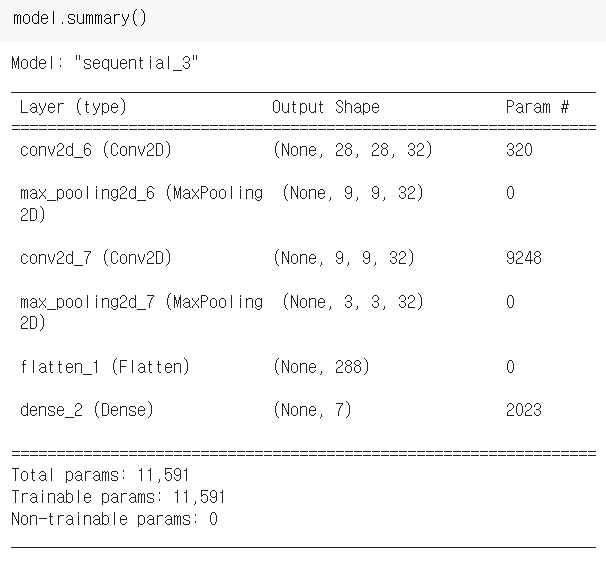

In [ ]:
# 모형 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
### x_train_0_6, y_train_0_6 데이터로 트레이닝 수행하는 코드 완성하세요.???
history = model.fit(x_train_0_6, y_train_0_6,
                    epochs=5,
                    batch_size=32,
                    validation_data=(x_test_0_6, y_test_0_6))

Epoch 1/5


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_22" is incompatible with the layer: expected shape=(None, 28, 28, 1), found shape=(None, 32, 32, 3)


### [15점] Q4 x_test_0_6, y_test_0_6 의 테스트 데이터에 대해 성능을 평가해보세요.

In [ ]:
## evaluation 코드 완성하세요
# 테스트 데이터에 대해 성능 평가
loss, accuracy = model.evaluate(x_test_0_6, y_test_0_6)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2066, in test_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2049, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2037, in run_step  **
        outputs = model.test_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1917, in test_step
        y_pred = self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_22" is incompatible with the layer: expected shape=(None, 28, 28, 1), found shape=(None, 32, 32, 3)
